In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Functions, Tables, and Groups

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though the tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

## 1. Burrito-ful San Diego

In [6]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore")

Mira, Sofia, and Sara are trying to use Data Science to find the best burritos in San Diego! Their friends Jessica and Sonya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their overall rating. The `Overall` rating is not an average of the `Yelp` and `Google` ratings, but rather it is the overall rating of the customers that were surveyed in the study above.


It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [7]:
# Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv").drop(0)
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne Asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak With Guacamole,11.5
Burrito Factory,Steak Everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together, so that we have a table with the ratings for every corresponding menu item from every restaurant. Each menu item has the same rating as the restaurant from which it is from. **(8 Points)**

*Note:* It doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.

*Hint:* If you need help on using the `join` method, refer to the [Python Reference Sheet](http://data8.org/sp22/python-reference.html) or [Section 8.4](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html) in the textbook.


In [8]:
burritos = ratings.join("Name", burritos_types)
burritos.show(15)

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne Asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak Everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne Asada,6.89
Burros and Fries,3.5,4.1,3.575,Shrimp California,6.99
Caliente Mexican Food,3.5,4.4,3.25,California,6.47
Caliente Mexican Food,3.5,4.4,3.25,Carne Asada,5.56
Caliente Mexican Food,3.5,4.4,3.25,Fried Fish,5.56
California Burrito Company,3.5,4.4,3.2,California,5.5


In [9]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. **(8 Points)**


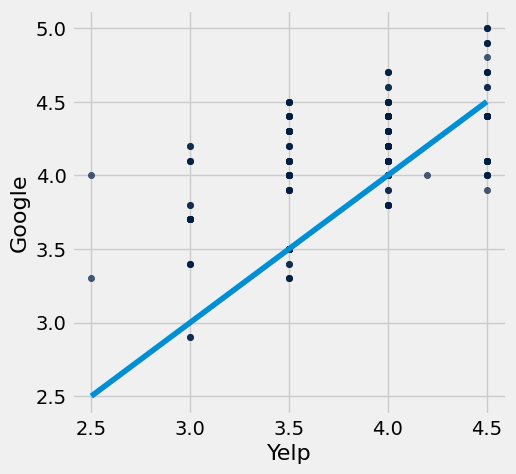

In [10]:
yelp_and_google = Table().with_columns(
    "Yelp", burritos["Yelp"],
    "Google", burritos["Google"]
)
yelp_and_google.scatter("Yelp", "Google")

# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x).
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

In [11]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below. **(8 Points)**


_Type your answer here, replacing this text._

<!-- END QUESTION -->

Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below. The video resource was made by a past staff member, Divyesh Chotai!

You can also use the [Table Functions Visualizer](http://data8.org/interactive_table_functions/) to get some more hands-on experience with the `.group` function.

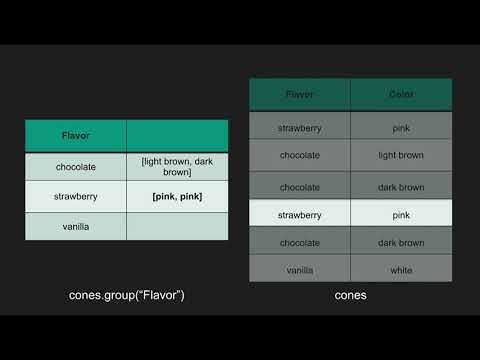

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** There are so many types of California burritos in the `burritos` table! Sara wants to know which type is the highest rated across all restaurants. For the sake of these questions, we are treating each menu item's rating the same as its respective restaurant's, as we do not have the rating of every single item at these restaurants. You do not need to worry about this fact, but we thought to mention it!

Create a table with two columns: the first column include the names of the burritos and the second column should contain the average overall rating of that burrito across restaurants. **In your calculations, you should only compare burritos that contain the word "California".** For example, there are "California" burritos, "California Breakfast" burritos, "California Surf And Turf" burritos, etc. **(9 Points)**

*Hint:* If multiple restaurants serve the "California - Chicken" burrito, what table method can we use to aggregate those together and find the average overall rating?

*Note:* For reference, the staff solution only used one line. However, feel free to break up the solution into multiple lines and steps; just make sure you assign the final output table to `california_burritos`! 


In [21]:
only_california = burritos.where("Menu_Item", are.containing("California")) # are.containing("s") chứa xâu s
#print(only_california)
only_california_ave = only_california.group("Menu_Item", np.average) #Nhóm theo Menu_Item, lấy trung bình all cột khác
#print(only_california_ave)
california_burritos = Table().with_columns(
    "Name", only_california_ave["Menu_Item"], 
    "Average", only_california_ave["Overall average"]
)
california_burritos

Name,Average
California,3.5242
California (Only Cheese),4.1
California + Guac + Sour Cream,3.4
California - Chicken,3.45839
California - Pork Adobada,3.26429
California - Steak,3.26429
California Breakfast,2.75833
California Chicken,3.54815
California Chipotle,4.36667
California Everything,4.1


In [22]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5.** Given this new table `california_burritos`, Sara can figure out the name of the California burrito with the highest overall average rating! Assign `best_california_burrito` to a line of code that outputs the string that represents the name of the California burrito with the highest overall average rating. If multiple burritos satisfy this criteria, you can output any one of them. **(8 Points)**


In [34]:
best_california_burrito = california_burritos.sort("Average", descending=True)["Name"].item(0)
best_california_burrito

'California Chipotle'

In [35]:
grader.check("q1_5")

q1_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 6.** Mira thinks that burritos in San Diego are cheaper (and taste better) than the burritos in Berkeley. Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that the histogram is more visually informative. **(8 Points)**


Ellipsis

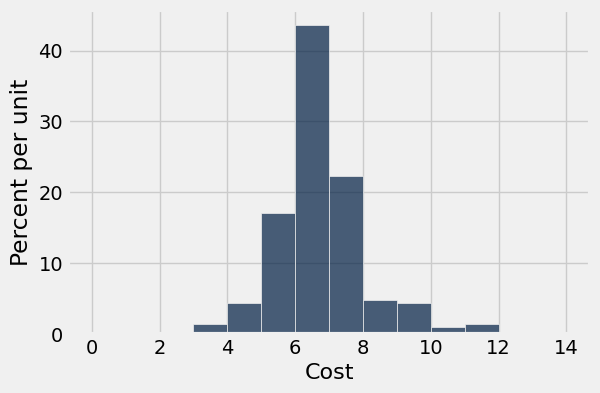

In [51]:
x = np.arange(0, 15, 1)
# Please also use the provided bins
burritos.hist("Cost", bins = x)

...

<!-- END QUESTION -->

**Question 7.** What percentage of burritos in San Diego are less than $6? Assign `burritos_less_than_6` to your answer, which should be between 0 and 100. You should only use the histogram above to answer the question. Do not use code on the table to to find the answer, just eyeball the heights and use Python to evaluate your arithmetic! **(8 Points)**

*Note*: Your answer does not have to be exact, but it should be within a couple percentages of the staff answer.


In [55]:
burritos_less_than_6 = 17+1+3

In [56]:
grader.check("q1_7")

q1_7 results: All test cases passed!

## 2. San Francisco City Employee Salaries

This exercise is designed to give you practice with using the Table methods `.pivot` and `.group`. Here is a link to the [Python Reference Sheet](http://data8.org/sp22/python-reference.html) in case you need a quick refresher. The [Table Function Visualizer](http://data8.org/interactive_table_functions/) may also be a helpful tool.

Run the cell below to view a demo on how you can use pivot on a table. (Thank you to past staff Divyesh Chotai!)

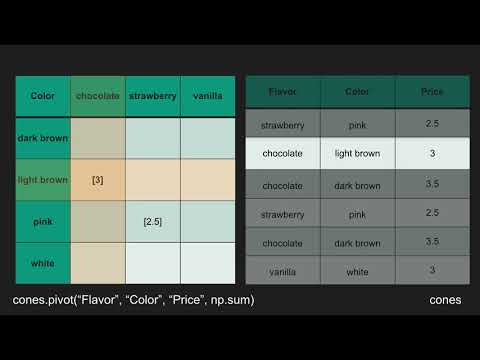

In [57]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

The data source we will use within this portion of the homework is [publicly provided](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd/data) by the City of San Francisco. We have filtered it to retain just the relevant columns and restricted the data to the calendar year 2019. Run the following cell to load our data into a table called `full_sf`.

In [58]:
full_sf = Table.read_table("sf2019.csv")
full_sf.show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706


The table has one row for each of the 44,525 San Francisco government employees in 2019.

The first four columns describe the employee's job. For example, the employee in the third row of the table had a job called "IS Business Analyst-Senior". We will call this the employee's *position* or *job title*. The job was in a Job Family called Information Systems (hence the IS in the job title), and was in the Adult Probation Department that is part of the Public Protection Organization Group of the government. You will mostly be working with the `Job` column.

The next three columns contain the dollar amounts paid to the employee in the calendar year 2019 for salary, overtime, and benefits. Note that an employee’s salary does not include their overtime earnings.

The last column contains the total compensation paid to the employee. It is the sum of the previous three columns:

$$\text{Total Compensation} = \text{Salary} + \text{Overtime} + \text{Benefits}$$

For this homework, we will be using the following columns:
1. `Organization Group`: A group of departments. For example, the **Public Protection** Org. Group includes departments such as the Police, Fire, Adult Protection, District Attorney, etc.
2. `Department`: The primary organizational unit used by the City and County of San Francisco.
3. `Job`: The specific position that a given worker fills.
4. `Total Compensation`: The sum of a worker's salary, overtime, and benefits in 2019.


Run the following cell to select the relevant columns and create a new table named `sf`.

In [59]:
sf = full_sf.select("Job", "Department", "Organization Group",  "Total Compensation")
sf.show(5)

Job,Department,Organization Group,Total Compensation
IS Trainer-Journey,Adult Probation,Public Protection,131391
IS Engineer-Assistant,Adult Probation,Public Protection,172520
IS Business Analyst-Senior,Adult Probation,Public Protection,162468
IS Business Analyst-Principal,Adult Probation,Public Protection,216706
IS Programmer Analyst,Adult Probation,Public Protection,98706


We want to use this table to generate arrays with the job titles of the members of each **Organization Group**.

**Question 1.** Set `job_titles` to a table with two columns. The first column should be called `Organization Group` and have the name of every "Organization Group" once, and the second column should be called `Jobs` with each row in that second column containing an *array* of the names of all the job titles within that "Organization Group". Don't worry if there are multiple of the same job titles. **(9 Points)**

*Hint:* Think about how `group` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to `group`. 


In [65]:
# Pick one of the two functions defined below in your call to group.
def first_item(array):
    '''Returns the first item'''
    return array.item(0)

def full_array(array):
    '''Returns the array that is passed through'''
    return array 

table_organ_group = sf.group("Organization Group", full_array)

# Make a call to group using one of the functions above when you define job_titles
job_titles = Table().with_columns(
    "Organization Group", table_organ_group["Organization Group"], 
    "Jobs", table_organ_group["Job full_array"]
)
job_titles

Organization Group,Jobs
Community Health,"['Painter Supervisor 1' 'Painter' 'Painter' ..., 'Nursin ..."
Culture & Recreation,['Electrician' 'Executive Secretary 2' 'Bldgs & Grounds ...
General Administration & Finance,"['Painter' 'Painter' 'Electrician' ..., 'Investigator, T ..."
Human Welfare & Neighborhood Development,['Dept Head I' 'Administrative Analyst' 'Community Devel ...
Public Protection,['IS Trainer-Journey' 'IS Engineer-Assistant' 'IS Busine ...
"Public Works, Transportation & Commerce",['Heavy Equip Ops Asst Sprv' 'Heavy Equipment Ops Sprv' ...


In [66]:
grader.check("q2_1")

q2_1 results: All test cases passed!

#### Understanding the code you just wrote in 2.1 is important for moving forward with the class! If you made a lucky guess, take some time to look at the code, step by step. Office hours is always a great resource!

<!-- BEGIN QUESTION -->

**Question 2.** At the moment, the `Job` column of the `sf` table is not sorted (no particular order). Would the arrays you generated in the `Jobs` column of the previous question be the same if we had sorted alphabetically instead before generating them? Explain your answer. To receive full credit, your answer should reference *how* the `.group` method works, and how sorting the `Jobs` column would affect this.  **(8 Points)**

*Note:* Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`.


_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the organization groups as the columns. The values in the rows should correspond to a total compensation range, where range is defined as the **difference between the highest total compensation and the lowest total compensation in the department for that organization group**. **(9 Points)**

*Hint 1:* First you'll need to define a new function `compensation_range` which takes in an array of compensations and returns the range of compensations in that array.

*Hint 2:* What table function allows you to specify the rows and columns of a new table? You probably watched a video on it earlier in the homework!


In [98]:
# Define compensation_range first
def compensation_range(array):
    return max(array) - min(array)
test = sf.group(["Department","Organization Group"], compensation_range)
department_ranges = test.pivot("Organization Group", "Department",  values="Total Compensation compensation_range", collect=sum)
department_ranges

Department,Community Health,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
Academy Of Sciences,0,199121,0,0,0,0
Administrative Services,0,0,478784,0,0,0
Adult Probation,0,0,0,0,303419,0
Airport Commission,0,0,0,0,0,445092
Art Commission,0,251823,0,0,0,0
Asian Art Museum,0,298230,0,0,0,0
Assessor,0,0,277385,0,0,0
Board Of Appeals,0,0,0,0,0,243582
Board Of Supervisors,0,0,293773,0,0,0
Building Inspection,0,0,0,0,0,340852


In [90]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.** Give an explanation as to why some of the row values are `0` in the `department_ranges` table from the previous question. **(8 Points)**


_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 5.** Find the number of departments appearing in the `sf` table that have an average total compensation of greater than 125,000 dollars; assign this value to the variable `num_over_125k`. **(9 Points)**

*Hint:* The variable names provided are meant to help guide the intermediate steps and general thought process. Feel free to delete them if you'd prefer to start from scratch, but make sure your final answer is assigned to `num_over_125k`!


In [94]:
print(sf)
tab = sf.group("Department", np.average)
print(tab)
num_over_125k = np.count_nonzero(tab["Total Compensation average"] >= 125000)
num_over_125k

Job                            | Department      | Organization Group | Total Compensation
IS Trainer-Journey             | Adult Probation | Public Protection  | 131391
IS Engineer-Assistant          | Adult Probation | Public Protection  | 172520
IS Business Analyst-Senior     | Adult Probation | Public Protection  | 162468
IS Business Analyst-Principal  | Adult Probation | Public Protection  | 216706
IS Programmer Analyst          | Adult Probation | Public Protection  | 98706
IS Project Director            | Adult Probation | Public Protection  | 236572
IT Operations Support Admin IV | Adult Probation | Public Protection  | 173269
Accountant III                 | Adult Probation | Public Protection  | 158135
Statistician                   | Adult Probation | Public Protection  | 126624
Senior Administrative Analyst  | Adult Probation | Public Protection  | 163843
... (44515 rows omitted)
Department              | Job average | Organization Group average | Total Compensation average

23

In [95]:
grader.check("q2_5")

q2_5 results: All test cases passed!

You're done with Homework 4!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [97]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf = False, 
              run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_4 results: All test cases passed!

    q1_5 results: All test cases passed!

    q1_7 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_3 results:
        q2_3 - 1 result:
            ✅ Test case passed

        q2_3 - 2 result:
            ❌ Test case failed
            Trying:
                set(['Department', 'Community Health', 'Culture & Recreation', 'General Administration & Finance', 'Human Welfare & Neighborhood Development', 'Public Protection', 'Public Works, Transportation & Commerce']) == set(department_ranges.labels)
            Expecting:
                True
            **********************************************************************
            Line 1, in q2_3 1
            Failed example:
              